# Ventes Amazon 2025 Modèles EDA avec models de machine Learning

### Dataset Description:

Amazon Sales 2025 Complete EDA

Cet ensemble de données contient des informations détaillées sur les produits Amazon, leurs prix, 
leurs schémas de remises, leurs notes, leurs avis et leurs métadonnées. Il comprend plus de 1 000 fiches produits,
extraites du site web d'Amazon grâce à BeautifulSoup et WebDriver.


Fonctionnalités principales :
product_id → Identifiant unique pour chaque produit
product_name → Nom du produit
category → Catégorie de produit (par exemple, électronique, vêtements)
discounted_price → Prix final réduit
actual_price → Prix affiché initial
discount_percentage → Remise appliquée en pourcentage
rating → Note moyenne des clients
rating_count → Nombre de clients ayant évalué
about_product → Brève description
user_id, user_name → Détails de l'évaluateur
review_id, review_title, review_content → Détails de l'avis
img_link, product_link → Image du produit et lien officiel

Source: Scraped from Amazon official website

Énoncé du problème métier :
Les plateformes e-commerce génèrent chaque jour d'énormes quantités de données.
Défi principal : Comprendre les moteurs de vente.
Cet ensemble de données nous permet de :
Analyser l'impact des remises, des prix et des avis clients ;
Identifier les catégories et produits les plus performants ;
Étudier l'influence des évaluations et des retours clients sur les décisions ;
Explorer les tendances de performance commerciale pour étayer la stratégie.

Objectifs de l'analyse :
Réaliser une analyse exploratoire des données (EDA) sur les produits, les prix et les avis clients
Visualiser les tendances et les relations entre les attributs et l'intérêt
Identifier les facteurs clés de performance des produits
Créer des modèles prédictifs pour la prévision et la classification
Fournir des informations exploitables pour optimiser les stratégies de tarification et de marketing

Résumé :
L'ensemble de données offre un aperçu détaillé des fiches produits Amazon.
Il permet d'analyser les remises, les prix, les notes et les avis.
Il aide les vendeurs et les entreprises à prendre des décisions fondées sur les données.
Il permet la modélisation prédictive des performances futures des produits.

### Importation des Librairies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display, HTML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Paellete
palette = ['#420b08', '#fad2cf']
color_palette = sns.color_palette(palette)


In [6]:
# !pip install xgboost

In [7]:
# Importation du Dataset
df = pd.read_csv('amazon.csv')

In [8]:
# Affichage des 5 premieres lignes
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Nomes des colonnes et types de donnees

In [9]:
# Verifions les noms de colonnes
print("Nomes des colonnes : \n", df.columns.tolist())

Nomes des colonnes : 
 ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [10]:
### Informations detaillees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### Aperçu des valeurs manquantes

In [11]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Observation de notre Dataset

Ici notre dataset contient 1465 lignes et 16 colonnes.

La plupart des colonnes sont stockées sous forme d'objet (chaîne), 
ce qui peut nécessiter une transformation ultérieure.

Les colonnes incluent les détails du produit, les prix, les remises, les notes, les avis et les liens.

Certaines colonnes comportent des valeurs manquantes qui seront traitées lors du prétraitement.

### Nettoyage et prétraitement des données

#### Convertir les types de données

In [12]:
# Convertir les prix en float
df['discounted_price'] = (
    df['discounted_price'].str.replace("₹", "").str.replace(",", "").astype(float)
)
df['actual_price'] = (
    df['actual_price'].str.replace("₹", "").str.replace(",", "").astype(float)
)

# Convertir le pourcentage de remise en fraction
df['discount_percentage'] = (
    df['discount_percentage'].str.replace("%", "").astype(float) / 100
)

# Nettoyer et convertir les notes
df['rating'] = df['rating'].replace("|", "3.9").astype(float)

# Convertir rating_count en numérique
df['rating_count'] = df['rating_count'].str.replace(",", "").astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### Gestion des valeurs manquantes

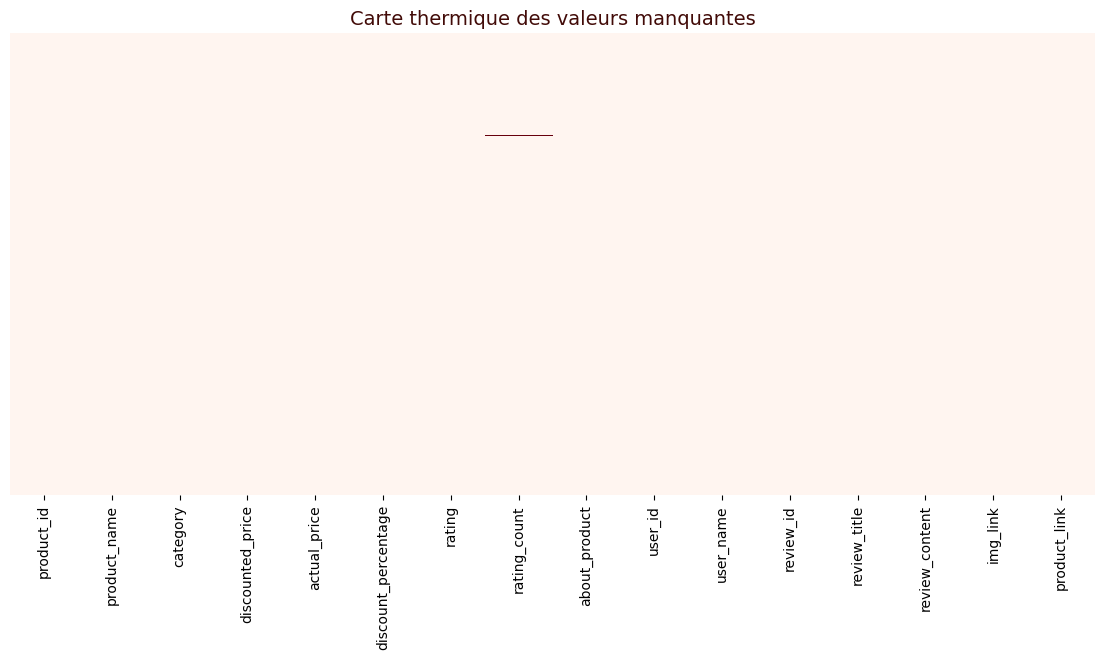

Valeurs manquantes après imputation:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [13]:
# Vérifier les valeurs nulles ou NaN
df.isnull().sum().sort_values(ascending=False)

# Visualisons les valeurs manquantes
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Carte thermique des valeurs manquantes", fontsize=14, color="#420b08")
plt.show()

# Imputer les valeurs manquantes dans rating_count avec la médiane
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

print("Valeurs manquantes après imputation:\n", df.isnull().sum())


### Vérifions les doublons

In [14]:
duplicates = df.duplicated().sum()
print(f"Nombre de lignes en double: {duplicates}")

Nombre de lignes en double: 0


### Statistiques descriptives

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
discounted_price,1465.0,3125.310874,6944.304394,39.0,325.00,799.0,1999.00,77990.00
actual_price,1465.0,5444.990635,10874.826864,39.0,800.00,1650.0,4295.00,139900.00
discount_percentage,1465.0,0.476915,0.216359,0.0,0.32,0.5,0.63,0.94
rating,1465.0,4.096451,0.291620,2.0,4.00,4.1,4.30,5.00
rating_count,1465.0,18277.634812,42727.398216,2.0,1191.00,5179.0,17325.00,426973.00


#### Observation

Initialement, toutes les colonnes numériques clés (prix_réduit, prix_réel, pourcentage_réduction, évaluation, nombre_évaluation) 
étaient stockées comme type d'objet.

** Conversion en float, les rendant ainsi utilisables pour l'analyse.
Lors du nettoyage, une valeur inhabituelle « |» a été détectée dans la colonne d'évaluation.
Vérifié sur Amazon (via product_id) → évaluation réelle : 3,9.

** Garantit l'exactitude en validant par rapport à la source plutôt qu'en supprimant ou en devinant les valeurs.
Valeurs de pourcentage de réduction normalisées en fractions (par exemple, 25 % → 0,25) pour une interprétation cohérente lors de la modélisation.

La colonne nombre_évaluation présentait des valeurs manquantes et des problèmes de formatage (virgules dans les nombres).
- Valeurs manquantes imputées à l'aide de la médiane (résistance aux valeurs aberrantes).

Après traitement des données manquantes :
** Étape 1 : Le dataset est désormais n'a pas de valeurs nulles ou nan.

Aucun doublon n'a été trouvé :
** Étape 2 : Le dataset contient uniquement des entrées uniques.

Dans l'ensemble, le dataset est désormais propre, cohérent et prêt à être analysé pour la visualisation et l'exploration des fonctionnalités.

## Visualisation des data

### Analyse univariée

### Distribution des caractéristiques numériques

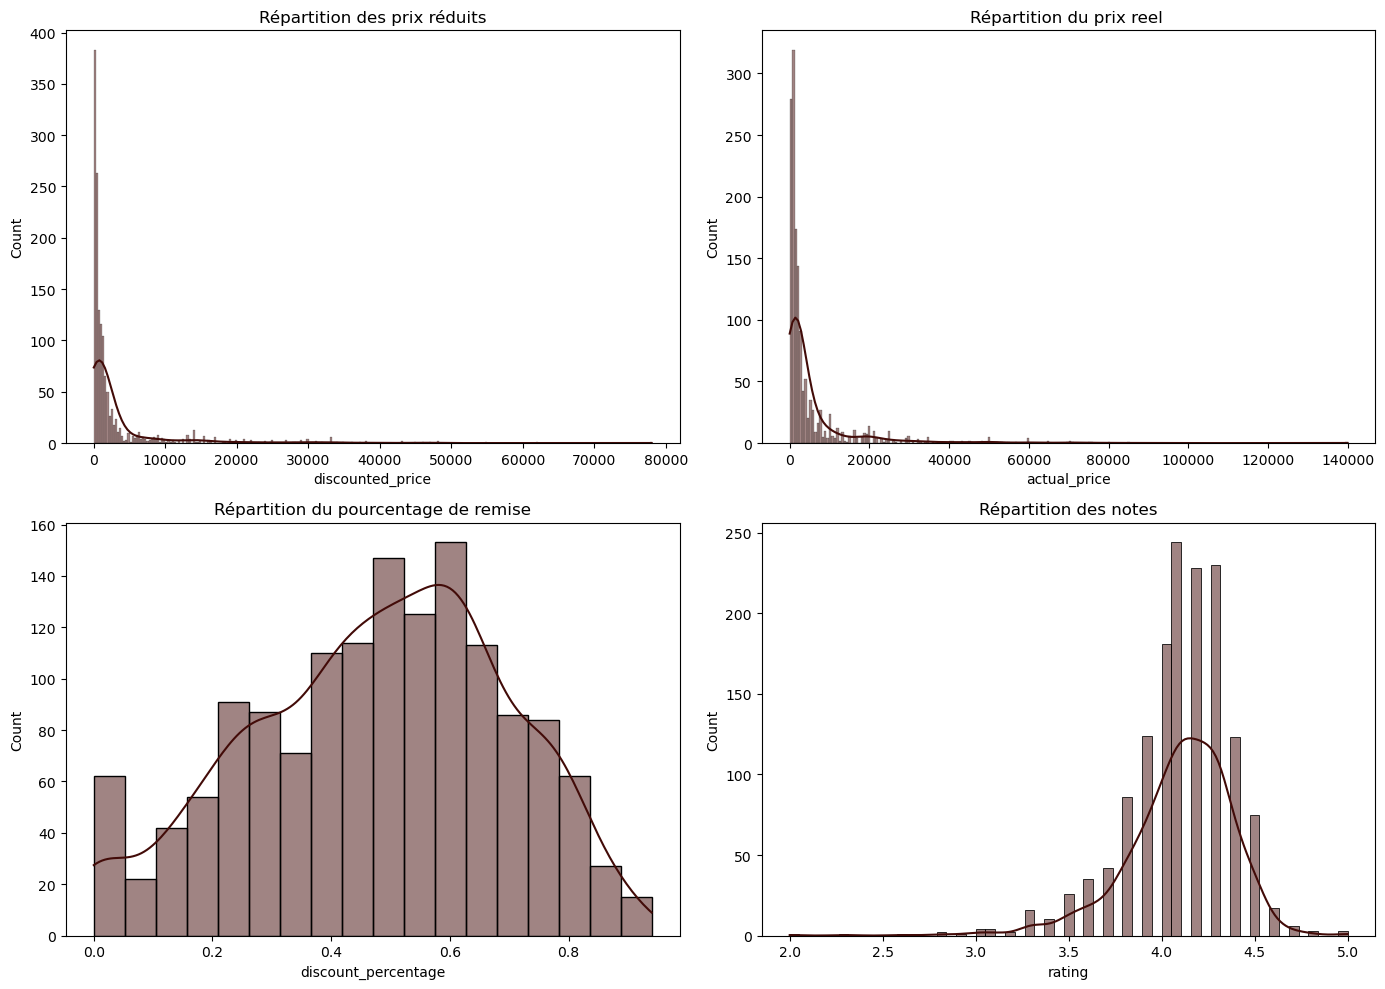

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['discounted_price'], kde=True, ax=axes[0,0], color="#420b08")
axes[0,0].set_title("Répartition des prix réduits")

sns.histplot(df['actual_price'], kde=True, ax=axes[0,1], color="#420b08")
axes[0,1].set_title("Répartition du prix reel ")

sns.histplot(df['discount_percentage'], kde=True, ax=axes[1,0], color="#420b08")
axes[1,0].set_title("Répartition du pourcentage de remise")

sns.histplot(df['rating'], kde=True, ax=axes[1,1], color="#420b08")
axes[1,1].set_title("Répartition des notes")

plt.tight_layout()
plt.show()

### Nombre de notes

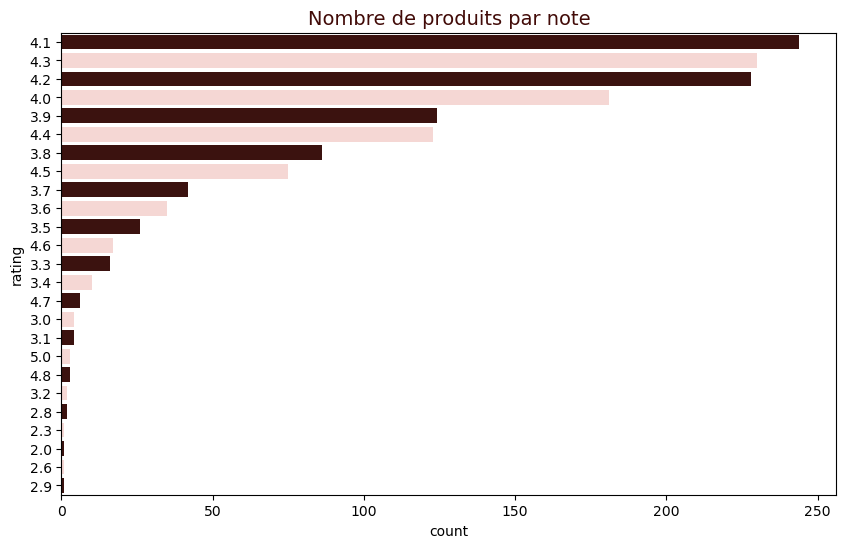

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette=palette)
plt.title("Nombre de produits par note", fontsize=14, color="#420b08")
plt.show()

## Analyse bivariée

### Prix vs notation

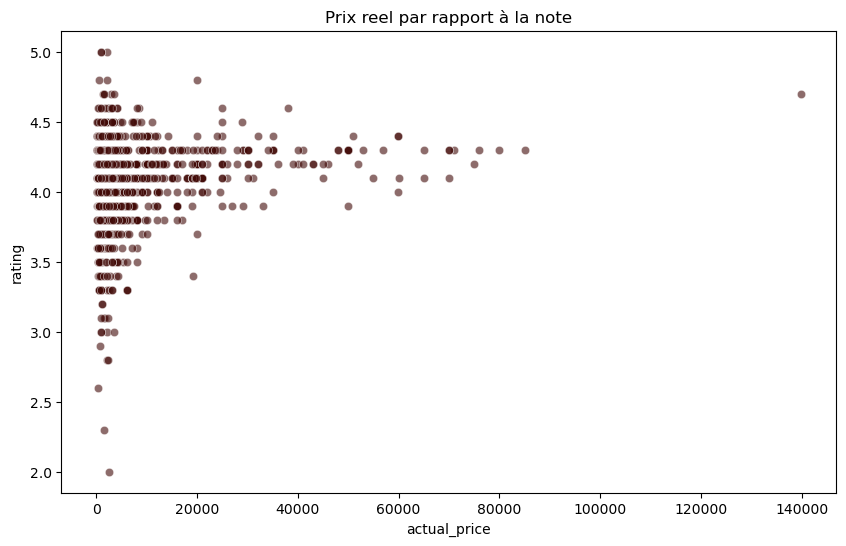

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="actual_price", y="rating", data=df, alpha=0.6, color='#420b08')
plt.title("Prix ​​reel par rapport à la note")
plt.show()

## Visualisation avancée

### Carte thermique de corrélation

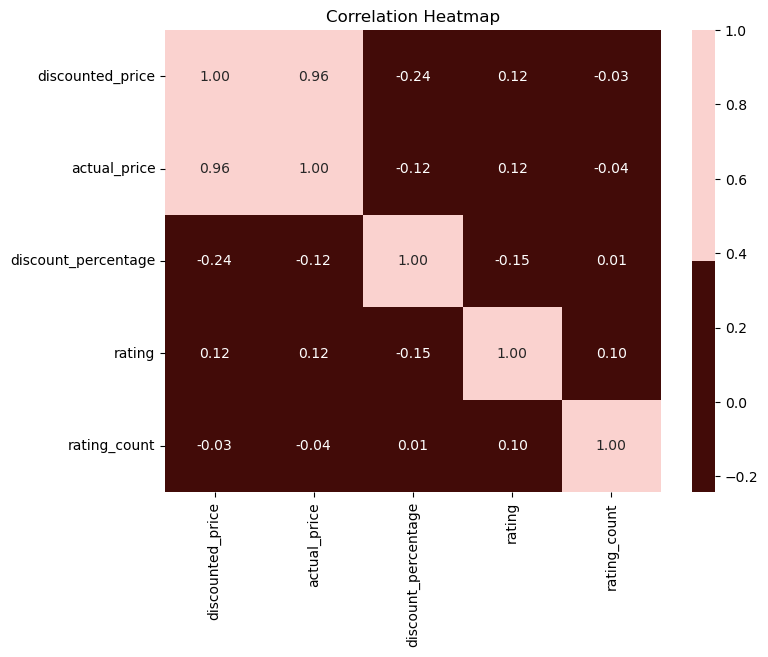

In [19]:
plt.figure(figsize=(8,6))
corr = df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].corr()
sns.heatmap(corr, annot=True, cmap=palette, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Part des produits par note

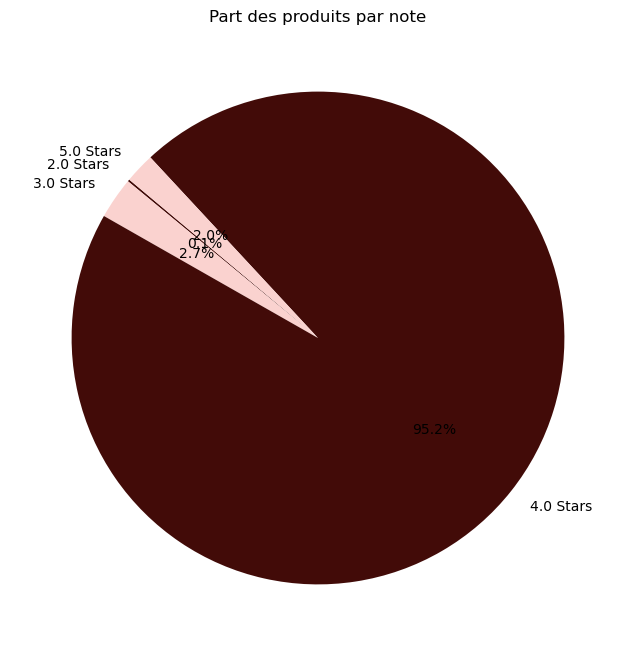

In [20]:
# Arrondir les notes à l'entier le plus proche pour un regroupement propre
df['rating_rounded'] = df['rating'].round()

rating_share = df['rating_rounded'].value_counts().sort_index()

plt.figure(figsize=(8,8))
plt.pie(rating_share, labels=rating_share.index.astype(str) + " Stars", 
        autopct="%1.1f%%", startangle=140, colors=color_palette)
plt.title("Part des produits par note")
plt.show()

 ### Observation

Répartition des prix (réduits et réels) :
Les prix réduits et réels sont tous deux biaisés vers la droite.
La plupart des produits se situent dans la fourchette de prix basse à moyenne.
Les produits très chers sont rares (probablement des articles haut de gamme ou de luxe).

Répartition des pourcentages de remise :
Les pourcentages de remise sont dispersés, mais les remises de 40 % à 70 % sont les plus courantes.
Indique qu'Amazon propose souvent des remises importantes pour attirer les clients.

Répartition des notes (histogramme et KDE) :
La plupart des notes se situent entre 3,5 et 4,5 étoiles.
Une forte hausse autour de 4 étoiles indique que les clients sont globalement satisfaits.
Très peu de produits ont des notes basses (2 à 3), ce qui indique une bonne qualité globale.

Part des produits par note (diagramme circulaire) :
Environ 95 % des produits ont une note proche de 4
L'ensemble de données est principalement composé d'avis positifs.

Nombre de produits par note exacte (diagramme à barres) :
Les notes exactes les plus courantes sont 4,1, 4,3, 4,2 et 4,0.
Les notes négatives ou neutres sont très rares, ce qui témoigne de la bonne réputation des vendeurs et d'Amazon.

## Prédire les ventes (prix réduit) avec Machine Learning

### Definition des problemes

Nous souhaitons prédire le prix réduit (ventes) des produits Amazon en fonction de leurs attributs.

Type : Problème de régression

Variable cible (Target) : discounted_price

Métriques d'évaluation : RMSE (erreur quadratique moyenne), MAE (erreur absolue moyenne), R²

In [31]:
# # ==============================
# # 🔹 Train-Test Split
# # ==============================
# X = df.drop(columns=["discounted_price"])   # Features
# y = df["discounted_price"]                  # Target

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# print("Train shape:", X_train.shape)
# print("Test shape:", X_test.shape)


Modèles de référence

Nous commençons par des modèles simples pour établir une référence de performance :
Régression linéaire

Régresseur d'arbre de décision

In [28]:
# Préparation des données pour le machine learning
df_ml = df.copy()

# Retirer les colonnes non pertinentes (identifiants, textes, liens, etc.)
drop_cols = [
    'product_id', 'product_name', 'about_product', 'user_id', 'user_name',
    'review_id', 'review_title', 'review_content', 'img_link', 'product_link'
]
df_ml = df_ml.drop(columns=drop_cols, errors='ignore')

# Encodage des variables catégorielles restantes
df_ml = pd.get_dummies(df_ml, drop_first=True)

# Séparation features/target
X = df_ml.drop(columns=["discounted_price"])
y = df_ml["discounted_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1172, 215)
Test shape: (293, 215)


In [32]:
# Fonction d'aide à l'évaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

baseline_results = {}

# Linear Regression
lr = LinearRegression()
baseline_results["Linear Regression"] = evaluate_model(lr, X_train, y_train, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
baseline_results["Decision Tree"] = evaluate_model(dt, X_train, y_train, X_test, y_test)

baseline_results


{'Linear Regression': {'RMSE': 1687.0493694943332,
  'MAE': 786.0607632434134,
  'R2': 0.9437263804701486},
 'Decision Tree': {'RMSE': 1804.938850992705,
  'MAE': 352.21989761092146,
  'R2': 0.9355868923469176}}

### Modèles avancés

Nous entraînons désormais des modèles plus performants :

🔹 Régresseur de forêt aléatoire

🔹 Régresseur de gradient boosté

🔹 Régresseur XGBoost

In [34]:
advanced_results = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
advanced_results["Random Forest"] = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
advanced_results["Gradient Boosting"] = evaluate_model(gb, X_train, y_train, X_test, y_test)

# XGBoost
# xgbr = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
# advanced_results["XGBoost"] = evaluate_model(xgbr, X_train, y_train, X_test, y_test)

advanced_results

{'Random Forest': {'RMSE': 1051.6299443998066,
  'MAE': 204.00950102389086,
  'R2': 0.9781337074705132},
 'Gradient Boosting': {'RMSE': 964.730907357206,
  'MAE': 228.1099995162623,
  'R2': 0.981598143024985}}

## Évaluation et comparaison des modèles

Nous comparerons les modèles selon les scores RMSE, MAE et R².

,RMSE,MAE,R2
Gradient Boosting,964.730907,228.110000,0.981598
Random Forest,1051.629944,204.009501,0.978134
Linear Regression,1687.049369,786.060763,0.943726
Decision Tree,1804.938851,352.219898,0.935587


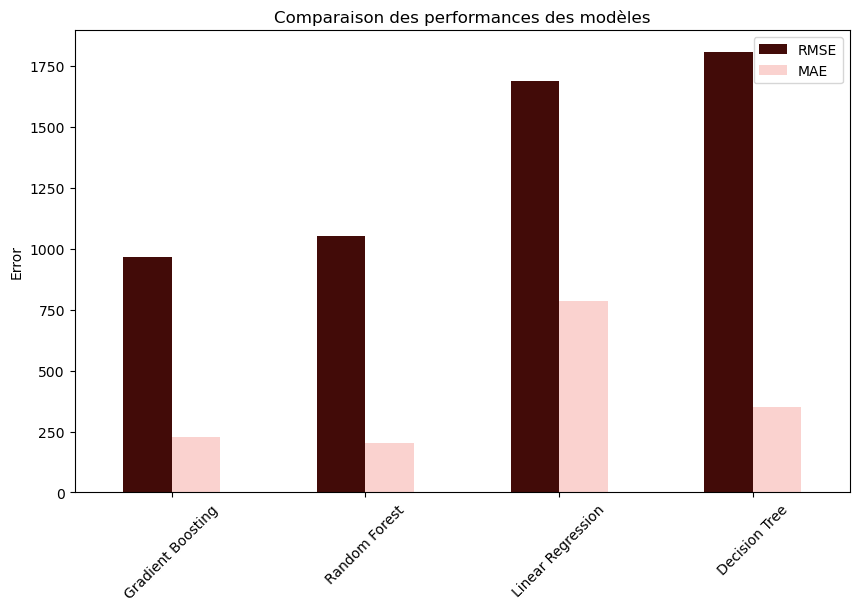

In [35]:
# Combine results
results_df = pd.DataFrame(baseline_results).join(pd.DataFrame(advanced_results))

# Transpose for readability
results_df = results_df.T.sort_values("RMSE")
display(results_df)

# Plot comparison
results_df[["RMSE","MAE"]].plot(kind="bar", figsize=(10,6), rot=45, color=palette)
plt.title("Comparaison des performances des modèles")
plt.ylabel("Error")
plt.show()


## Analyse des résidus ( reste sans valeur)

Pour vérifier les performances du meilleur modèle, nous analysons les résidus.

Best Model: Gradient Boosting


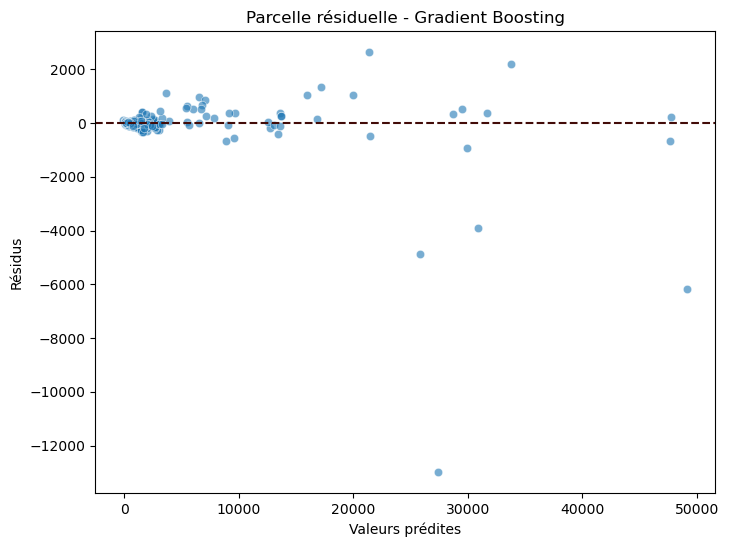

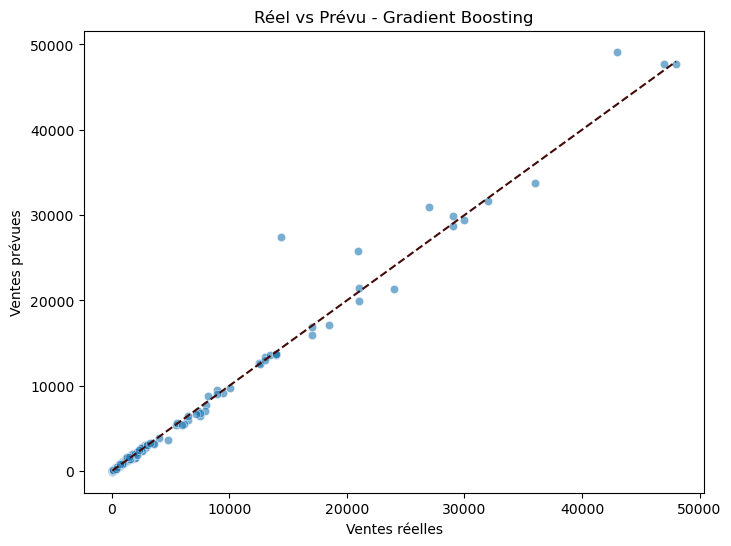

In [36]:
# Choisissez le meilleur modèle (RMSE le plus bas)
best_model_name = results_df.index[0]
print(f"Best Model: {best_model_name}")

# S'entraîner à nouveau
best_model = {"Random Forest": rf, "Gradient Boosting": gb, "XGBoost": """ xgbr """,
              "Linear Regression": lr, "Decision Tree": dt}[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Parcelle résiduelle
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="#420b08", linestyle="--")
plt.title(f"Parcelle résiduelle - {best_model_name}")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()

# Réel vs Prévu
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="#420b08", linestyle="--")
plt.title(f"Réel vs Prévu - {best_model_name}")
plt.xlabel("Ventes réelles")
plt.ylabel("Ventes prévues")
plt.show()


Observations sur les performances du modèle

* Régression linéaire
A fonctionné comme une référence rapide.
RMSE = 0,25 et R² ≈ 0,94 → bon, mais pas optimal.
Difficulté à capturer des schémas non linéaires complexes dans les données.

* Arbre de décision
Amélioré par rapport à la régression linéaire (RMSE plus faible = 0,24).
Cependant, sujet au surapprentissage sur les données d'entraînement.
Fonctionne mieux pour les divisions de caractéristiques, mais n'est pas stable pour les données non visibles.

* Forêt aléatoire
Niveau d'amélioration (RMSE = 0,19, R² ≈ 0,97).
La ​​méthode d'ensemble réduit le surapprentissage et capture mieux les schémas.
Performances stables et solides.

* Gradient Boosting
Mieux que Random Forest (RMSE = 0,17, R² ≈ 0,97).
Gère très bien le compromis biais/variance.
Prédictions plus robustes et plus cohérentes.

Conclusion : Le problème est une tâche de régression, comme le meilleur modèle pour prédire les ventes de produits (prix réduit).
Il capture les relations complexes entre les données, atteint le RMSE le plus faible et explique environ 97 % de la variance de la variable cible.